# Amazon Echo Reviews Sentiment Analysis using Naive Bayes and logistic regression

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the data
reviews_df =  pd.read_csv('amazon_reviews.csv')
reviews_df.sample(10)

,rating,date,variation,verified_reviews,feedback
3137,5,30-Jul-18,Black Dot,Very convenient,1
2424,5,30-Jul-18,Configuration: Fire TV Stick,I loved the I can use voice to make a request....,1
1578,5,29-Jul-18,White Show,Love being able to read the lyrics of my favor...,1
2582,5,30-Jul-18,Black Dot,Have the echo wanted something smaller in anot...,1
1518,4,30-Jul-18,White Show,Can’t change voice of Echo,1
2690,5,30-Jul-18,Black Dot,I love this item and being able to hear any ki...,1
1823,5,28-Jul-18,Black Plus,Love warehouse buys. If this was just in good ...,1
2610,5,30-Jul-18,Black Dot,I love how compact it is.,1
2656,5,30-Jul-18,Black Dot,"Very intelligent, love the songs ....",1
2098,1,29-Jun-18,Black Plus,Got this a few months ago with the idea that i...,0


In [3]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
reviews_df.drop('date',axis=1,inplace=True)

In [6]:
reviews_df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


# TASK #3: PERFORM DATA VISUALIZATION

<AxesSubplot:>

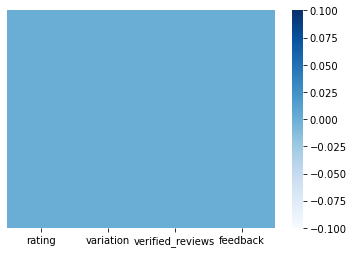

In [7]:
sns.heatmap(reviews_df.isnull(),yticklabels=False,cmap='Blues')

<AxesSubplot:xlabel='rating', ylabel='count'>

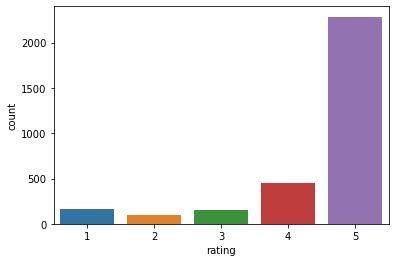

In [8]:
# Plot the count plot for the ratings
sns.countplot(x='rating',data=reviews_df)

<AxesSubplot:xlabel='feedback', ylabel='count'>

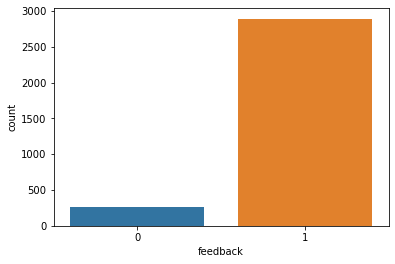

In [9]:
sns.countplot(x='feedback',data=reviews_df)

In [10]:
reviews_df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

# TASK #4: PERFORM DATA EXPLORATION

In [11]:
# Let's get the length of the verified_reviews column
reviews_df['length']= reviews_df['verified_reviews'].apply(len)

In [12]:
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:>

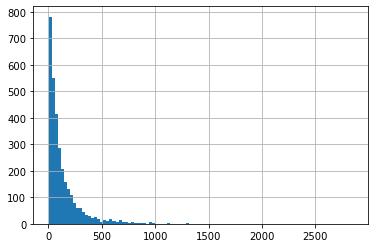

In [13]:
# Plot the histogram for the length
reviews_df['length'].hist(bins=100)

In [14]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [15]:
# Let's see the longest message 
reviews_df[reviews_df['length']==reviews_df['length'].max()]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
reviews_df[reviews_df['length']==round(reviews_df['length'].mean())]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

# TASK #5: PLOT THE WORDCLOUD

In [17]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback']==1]


In [18]:
positive

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [19]:
# Obtain the negative reviews only
negetive = reviews_df[reviews_df['feedback']==0]

In [20]:
negetive

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [21]:
# Convert to list format
len(list(positive['verified_reviews']))


2893

In [22]:
# Join all reviews into one large string
positive_sentences = ' '.join(list(positive['verified_reviews']))

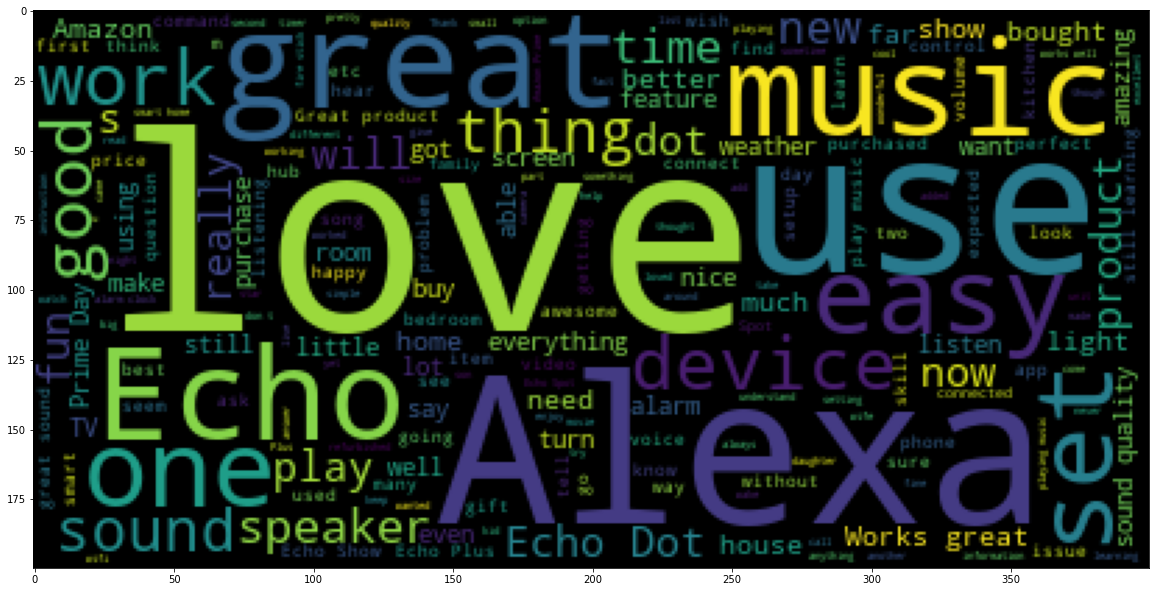

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(max_words=2000).generate(positive_sentences))

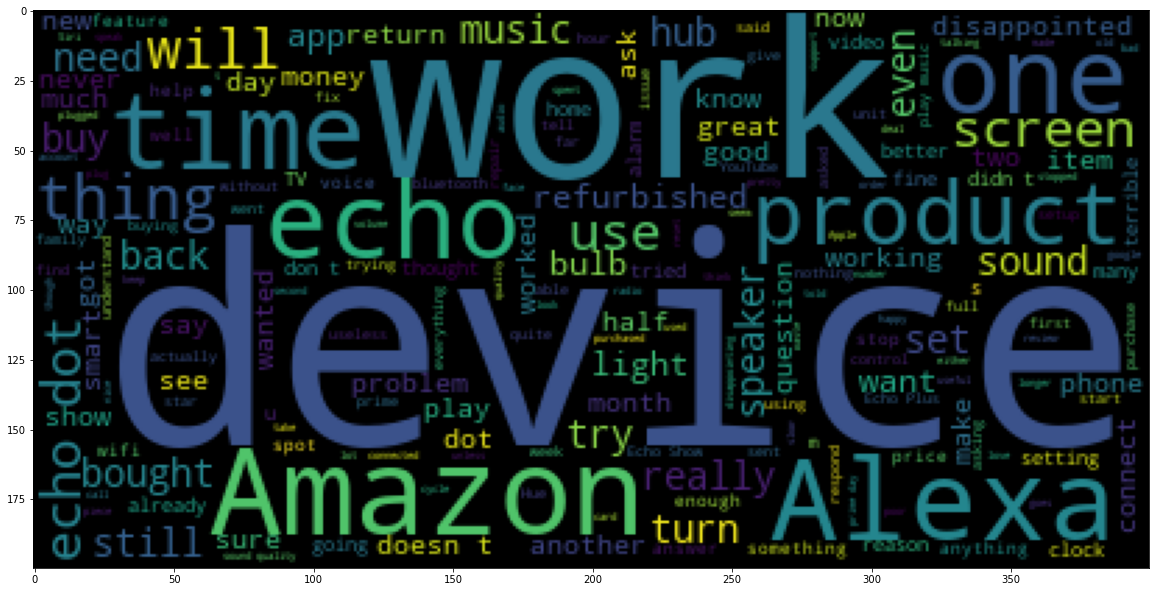

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(max_words=2000).generate(' '.join(list(negetive['verified_reviews']))))

# TASK #6: TEXT DATA CLEANING 101

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
Test = '$Hey, I am Suman Das...!!!!'

In [27]:
[ char for char in Test if char not in string.punctuation ]

['H',
 'e',
 'y',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'S',
 'u',
 'm',
 'a',
 'n',
 ' ',
 'D',
 'a',
 's']

In [28]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join([ char for char in Test if char not in string.punctuation ])
Test_punc_removed_join

'Hey I am Suman Das'

In [29]:
import nltk # Natural Language tool kit 

In [30]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI Projects on Rhyme and Coursera'

In [32]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [33]:
Test_punc_removed_join_clean

['enjoying', 'coding,', 'programming', 'AI', 'Projects', 'Rhyme', 'Coursera']

In [34]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'

In [35]:
def clean_text(text):
  punctuation_free_text = ''.join([ char for char in text if char not in string.punctuation ])
  stopwords_free_text = ' '.join([ word for word in punctuation_free_text.split() if word.lower() not in stopwords.words('english') ])
  return stopwords_free_text
print(clean_text(mini_challenge))

mini challenge teach remove stopwords punctuations text


# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
countvectorizer=vectorizer.fit_transform(sample_data)

In [37]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [38]:
print(countvectorizer.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [39]:
vectorizer = CountVectorizer()
countvectorizer=vectorizer.fit_transform(['Hello World','Hello Hello World','Hello World world world'])
print(vectorizer.get_feature_names())
print(countvectorizer.toarray())

['hello', 'world']
[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [40]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def message_cleaning(text):
  punctuation_free_text = ''.join([ char for char in text if char not in string.punctuation ])
  ans = [ word for word in punctuation_free_text.split() if word.lower() not in stopwords.words('english')]
  return ans


In [41]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [42]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [43]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [45]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
reviews_countvectorizer.shape

(3150, 5211)

In [47]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [48]:
X = reviews

In [49]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [51]:
print('Shape of input features : ',X.shape)
print('Shape of output label : ',y.shape)

Shape of input features :  (3150, 5211)
Shape of output label :  (3150,)


# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

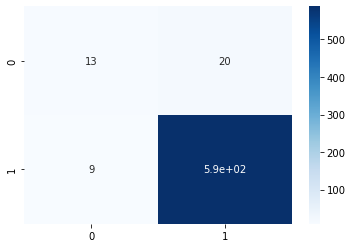

In [55]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True,cmap='Blues',cbar=True)

In [56]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.39      0.47        33
           1       0.97      0.98      0.98       597

    accuracy                           0.95       630
   macro avg       0.78      0.69      0.72       630
weighted avg       0.95      0.95      0.95       630



              precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.97      0.99      0.98       597

    accuracy                           0.96       630
   macro avg       0.87      0.71      0.76       630
weighted avg       0.96      0.96      0.96       630



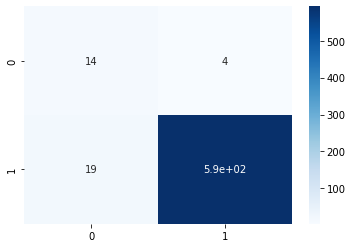

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True,cmap='Blues')

print(classification_report(y_test, y_pred))